In [458]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.svm

# Visual SVM

In [459]:
X, y = sklearn.datasets.make_blobs(n_samples=200, centers=2, random_state=0, cluster_std=0.7)

In [460]:
kernel = "linear" # {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'}

c = 1 # Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is           a squared l2 penalty.
#The C parameter trades off correct classification of training examples against maximization of the decision function’s margin. For larger values of C, a smaller margin will be accepted if the decision function is better at classifying all training points correctly. A lower C will encourage a larger margin, therefore a simpler decision function, at the cost of training accuracy. In other words C behaves as a regularization parameter in the SVM.

gamma = 1 # {'scale', 'auto'} or float -> large value overfitting
# Intuitively, the gamma parameter defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’. The gamma parameters can be seen as the inverse of the radius of influence of samples selected by the model as support vectors.

degree = 10 # only used for the ‘poly’ kernel

In [461]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    ax.contour(X, Y, P, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

    if plot_support:
        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=10, linewidth=10,)
        ax.set_xlim(xlim)
        ax.set_ylim(ylim)

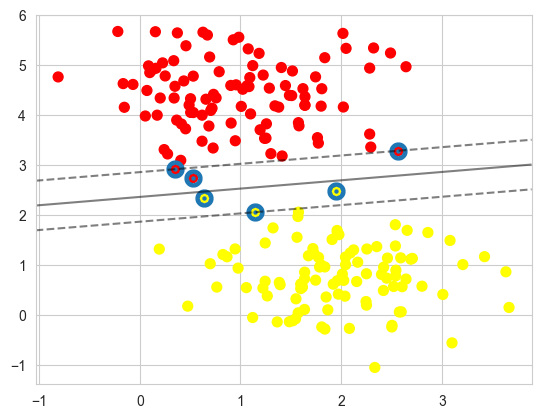

In [462]:
model = sklearn.svm.SVC(kernel=kernel, C=c,gamma=gamma,degree=degree)
model.fit(X, y)
ax = plt.gca()
ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model,ax,True)

# GridSearch

In [463]:
params = {  'kernel' :  ['linear', 'poly', 'rbf', 'sigmoid'],
            'C' :       [1],
            'gamma' :   ['auto'],
            'degree' :  [3]}

In [464]:
def gridSearch(model,params_input,X_train,y_train,detailedOutput=False,**kwargs):
    clf= sklearn.model_selection.GridSearchCV(model, params_input, n_jobs=-1,**kwargs)
    clf.fit(X_train, y_train)

    print(f"{'Best parameters':-^51s}")
    for key in clf.best_params_.keys():
        if not isinstance(clf.best_params_[key],str):
            value = str(clf.best_params_[key])
        else:
            value = clf.best_params_[key]

        print(f"{key:30s}:{value:20s}")
    print(51*"-")

    if detailedOutput:
        means = clf.cv_results_['mean_test_score']
        stds = clf.cv_results_['std_test_score']
        params = clf.cv_results_['params']
        combinedValues = sorted(zip(means, stds,params),key=lambda x:x[0],reverse=True)
        print(f"\n\n{'Detailed View':-^51s}")
        print(f"{'score':^11s}|")
        for mean, std, param in combinedValues:
            print(f"{mean:05.3f}±{std:05.3f}|{param}")

    return params

------------------Best parameters------------------
C                             :1                   
degree                        :3                   
gamma                         :auto                
kernel                        :linear              
---------------------------------------------------


-------------------Detailed View-------------------
   score   |
1.000±0.000|{'C': 1, 'degree': 3, 'gamma': 'auto', 'kernel': 'linear'}
1.000±0.000|{'C': 1, 'degree': 3, 'gamma': 'auto', 'kernel': 'poly'}
0.995±0.010|{'C': 1, 'degree': 3, 'gamma': 'auto', 'kernel': 'rbf'}
0.465±0.046|{'C': 1, 'degree': 3, 'gamma': 'auto', 'kernel': 'sigmoid'}


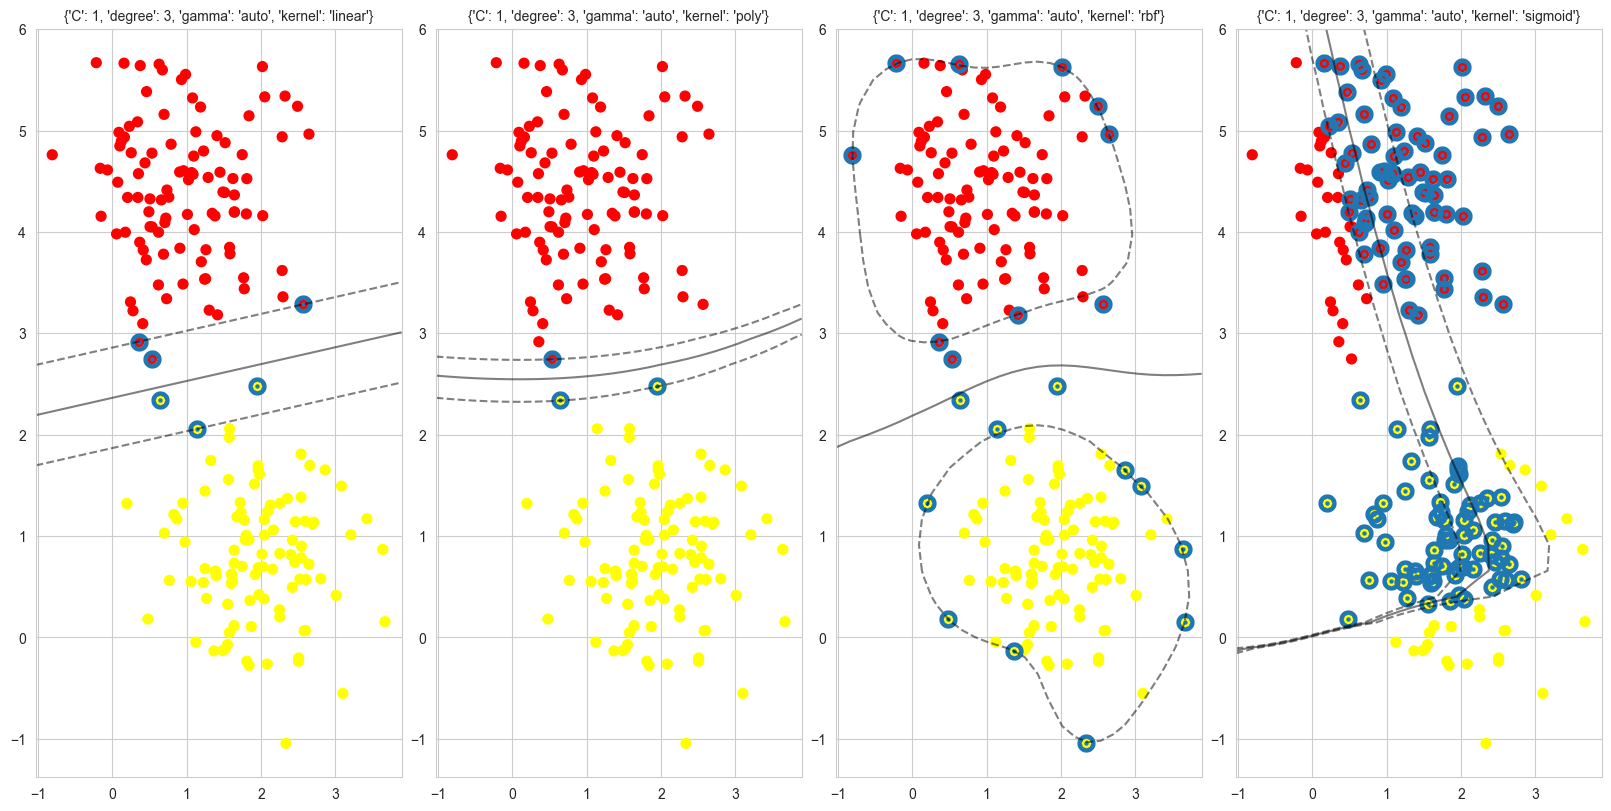

In [465]:
params = gridSearch(sklearn.svm.SVC(),params,X,y,detailedOutput=True)
COLUMNS = 4
fig, axs = plt.subplots(int((len(params)-1)/COLUMNS) + 1, COLUMNS, figsize=(COLUMNS*4, 4*(int(len(params)/COLUMNS) + 1)), constrained_layout=True)
for ax,param in zip(axs.flat,params):
    ax.set_title(f'{param}')

    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(10)

    model = sklearn.svm.SVC(**param)
    model.fit(X, y)
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model,ax,True)